In [1]:
import os

import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from matplotlib import pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
print(f"Total training cat images: {num_cats_tr}")
print(f"Total training dog images: {num_dogs_tr}")
print(f"Total validation cat images: {num_cats_val}")
print(f"Total validation dog images: {num_dogs_val}")
print('--')
print(f"Total training images: {total_train}")
print(f"Total validation images: {total_val}")

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [8]:
BATCH_SIZE = 32
EPOCHS = 15
IMG_H = 150
IMG_W = 150

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [10]:
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    batch_size=BATCH_SIZE,
    shuffle=True,
    target_size=(IMG_H, IMG_W),
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMG_H, IMG_W),
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [12]:
class_names = {}
for k, v in train_data_gen.class_indices.items():
    class_names[v] = k
class_names

{0: 'cats', 1: 'dogs'}

In [13]:
sample_img, sample_label = next(train_data_gen)

In [14]:
def plotImages(images, labels):
    plt.figure(figsize=(15,3))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.grid('off')
        plt.xlabel(class_names[labels[i]], fontsize=16)
    plt.tight_layout()

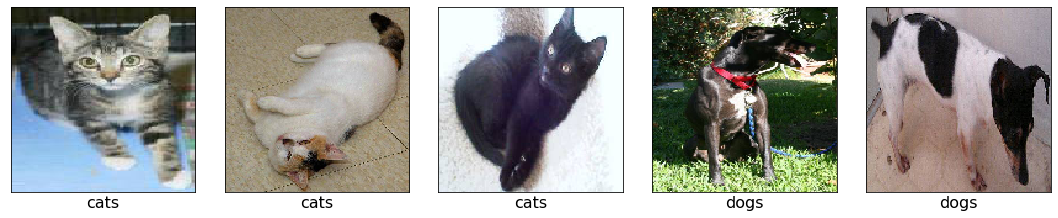

In [15]:
plotImages(sample_img, sample_label)

In [16]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',
           input_shape=(IMG_H, IMG_W, 3)),
    MaxPool2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = total_train // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=total_val // BATCH_SIZE)

Epoch 1/15
62/62 [==============================] - 10s 157ms/step - loss: 0.7351 - accuracy: 0.5254 - val_loss: 0.6857 - val_accuracy: 0.5716
Epoch 2/15
62/62 [==============================] - 8s 132ms/step - loss: 0.6469 - accuracy: 0.6128 - val_loss: 0.6188 - val_accuracy: 0.6613
Epoch 3/15
62/62 [==============================] - 8s 135ms/step - loss: 0.5686 - accuracy: 0.6972 - val_loss: 0.5860 - val_accuracy: 0.6885
Epoch 4/15
62/62 [==============================] - 9s 137ms/step - loss: 0.4898 - accuracy: 0.7612 - val_loss: 0.5884 - val_accuracy: 0.6845
Epoch 5/15
62/62 [==============================] - 9s 139ms/step - loss: 0.4044 - accuracy: 0.8191 - val_loss: 0.7428 - val_accuracy: 0.6815
Epoch 6/15
62/62 [==============================] - 9s 146ms/step - loss: 0.3357 - accuracy: 0.8521 - val_loss: 0.6817 - val_accuracy: 0.7036
Epoch 7/15
62/62 [==============================] - 9s 139ms/step - loss: 0.2475 - accuracy: 0.8989 - val_loss: 0.6832 - val_accuracy: 0.7127
Epoch

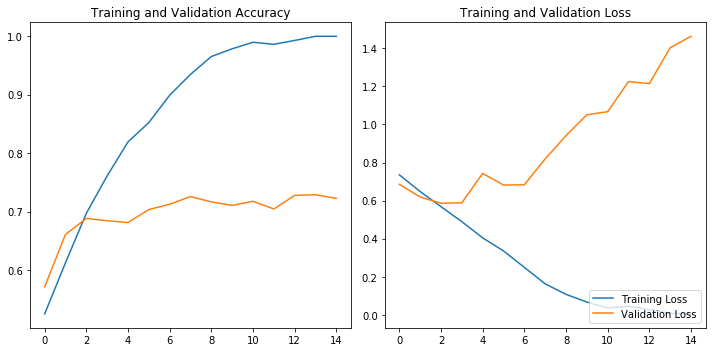

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=4)
plt.title('Training and Validation Loss')

plt.tight_layout()

In [21]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
    directory=train_dir,
    batch_size=BATCH_SIZE,
    shuffle=True,
    target_size=(IMG_H, IMG_W))

Found 2000 images belonging to 2 classes.


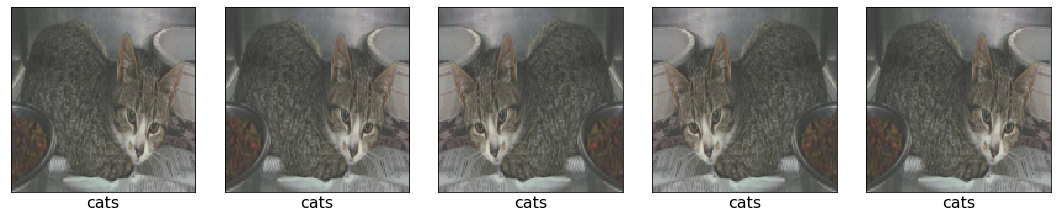

In [25]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images, [0 for _ in range(5)])

In [42]:
image_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=45,
    zoom_range=0.5,
    width_shift_range=.15,
    height_shift_range=.15,
    )

train_data_gen = image_gen.flow_from_directory(
    directory=train_dir,
    batch_size=BATCH_SIZE,
    shuffle=True,
    target_size=(IMG_H, IMG_W),
    class_mode='binary')

Found 2000 images belonging to 2 classes.


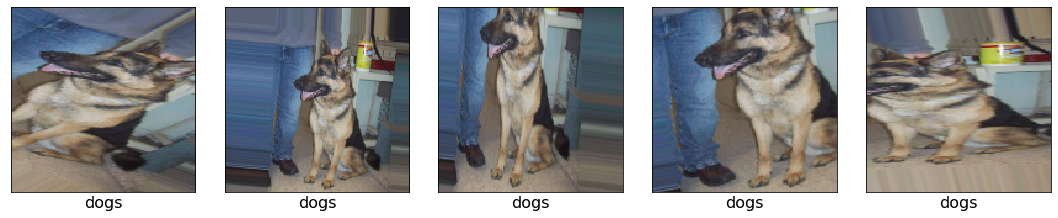

In [43]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
augmented_labels = [train_data_gen[0][1][0] for i in range(5)]
plotImages(augmented_images, augmented_labels)

In [46]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',
           input_shape=(IMG_H, IMG_W, 3)),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_new.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)       

In [48]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // BATCH_SIZE,
    epochs=50,
    validation_data=val_data_gen,
    validation_steps=total_val // BATCH_SIZE)

Epoch 1/50
62/62 [==============================] - 16s 264ms/step - loss: 0.8878 - accuracy: 0.5158 - val_loss: 0.6933 - val_accuracy: 0.4990
Epoch 2/50
62/62 [==============================] - 16s 263ms/step - loss: 0.6933 - accuracy: 0.4990 - val_loss: 0.6933 - val_accuracy: 0.4990
Epoch 3/50
62/62 [==============================] - 16s 265ms/step - loss: 0.6940 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.4990
Epoch 4/50
62/62 [==============================] - 16s 258ms/step - loss: 0.6933 - accuracy: 0.4975 - val_loss: 0.6931 - val_accuracy: 0.4990
Epoch 5/50
62/62 [==============================] - 16s 254ms/step - loss: 0.6932 - accuracy: 0.4949 - val_loss: 0.6931 - val_accuracy: 0.4990
Epoch 6/50
62/62 [==============================] - 16s 253ms/step - loss: 0.6932 - accuracy: 0.4868 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 7/50
62/62 [==============================] - 16s 252ms/step - loss: 0.6932 - accuracy: 0.4914 - val_loss: 0.6929 - val_accuracy: 0.5302

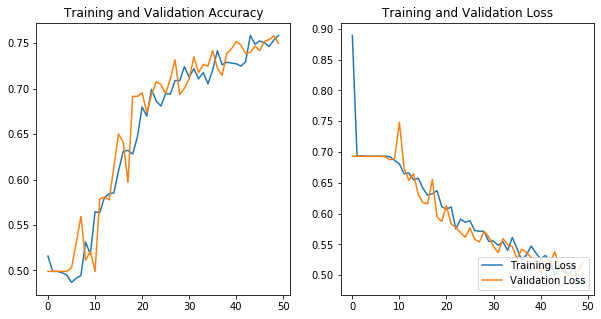

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=4)
plt.title('Training and Validation Loss')
plt.show()